In [1]:
import os, sys, pickle, math
import librosa

import numpy as np
import pandas as pd

from glob import glob
from tqdm import tqdm


from IPython.display import Audio

from config import config

In [2]:
def get_files(file_path_exp):
    files = glob(file_path_exp)
    files.sort()
    return {os.path.basename(x).split('.')[0]:x for x in files}

def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data =  pickle.load(f)
    return data

In [3]:
#get whisper, pyannot, vad, audio files
asr   = get_files(os.path.join(config['whisper']['output_path'], "*"))
diar  = get_files(os.path.join(config['pyannote']['diar_output_path'], "*"))
vads = get_files(os.path.join(config['pyannote']['vad_output_path'], "*"))
audio = get_files(os.path.join(config['podcast']['path'], "*"))


In [4]:
os.path.join(config['podcast']['path'], "*")

'/media/susmitha/HDD_14TB/NaturalVoices/podcasts/*'

In [5]:
for pod in audio: break
pod

'MSP-PODCAST_0001'

In [7]:
#read each for podcast pod
segments    = load_pickle(asr[pod])
diarization = load_pickle(diar[pod])
vad         = load_pickle(vads[pod])
wav, sr     = librosa.load(audio[pod], sr=16000)

In [8]:
for segment in segments: break

In [9]:
segment

Segment(id=1, seek=2998, start=33.7, end=36.68, text=' Hey, you are listening to Nothing Sounds Better Podcast.', tokens=[50364, 1911, 11, 291, 366, 4764, 281, 6693, 14576, 15753, 29972, 13, 50622], temperature=0.0, avg_logprob=-0.33200000858306883, compression_ratio=1.5610687022900764, no_speech_prob=0.67138671875, words=[Word(start=33.7, end=34.14, word=' Hey,', probability=0.495849609375), Word(start=34.26, end=34.32, word=' you', probability=0.8671875), Word(start=34.32, end=34.44, word=' are', probability=0.470947265625), Word(start=34.44, end=34.74, word=' listening', probability=0.71728515625), Word(start=34.74, end=35.0, word=' to', probability=0.90478515625), Word(start=35.0, end=35.34, word=' Nothing', probability=0.1956787109375), Word(start=35.34, end=35.84, word=' Sounds', probability=0.62353515625), Word(start=35.84, end=36.16, word=' Better', probability=0.8359375), Word(start=36.16, end=36.68, word=' Podcast.', probability=0.3251953125)])

In [10]:
segment.text

' Hey, you are listening to Nothing Sounds Better Podcast.'

In [11]:
start, end = segment.start, segment.end
Audio(data=wav[math.floor(start*sr): math.ceil(end*sr)], rate=sr)

In [12]:
segment.words

[Word(start=33.7, end=34.14, word=' Hey,', probability=0.495849609375),
 Word(start=34.26, end=34.32, word=' you', probability=0.8671875),
 Word(start=34.32, end=34.44, word=' are', probability=0.470947265625),
 Word(start=34.44, end=34.74, word=' listening', probability=0.71728515625),
 Word(start=34.74, end=35.0, word=' to', probability=0.90478515625),
 Word(start=35.0, end=35.34, word=' Nothing', probability=0.1956787109375),
 Word(start=35.34, end=35.84, word=' Sounds', probability=0.62353515625),
 Word(start=35.84, end=36.16, word=' Better', probability=0.8359375),
 Word(start=36.16, end=36.68, word=' Podcast.', probability=0.3251953125)]

In [13]:
segment.words[0]

Word(start=33.7, end=34.14, word=' Hey,', probability=0.495849609375)

In [14]:
segment.words[0].start, segment.words[0].end

(33.7, 34.14)

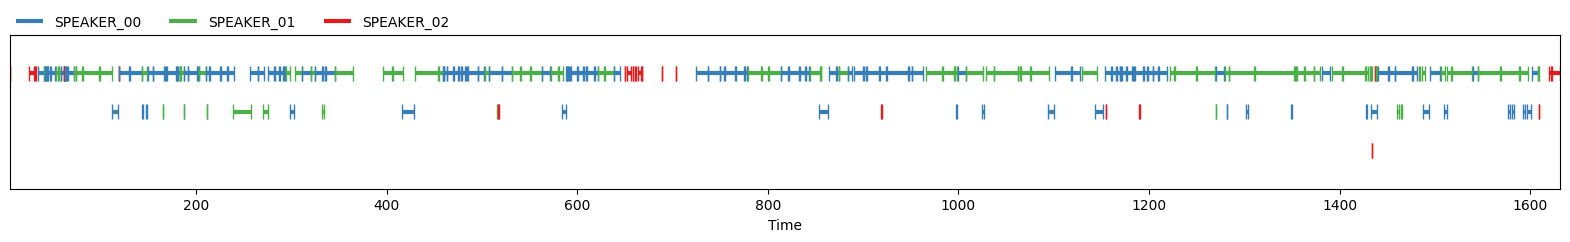

In [15]:
diarization

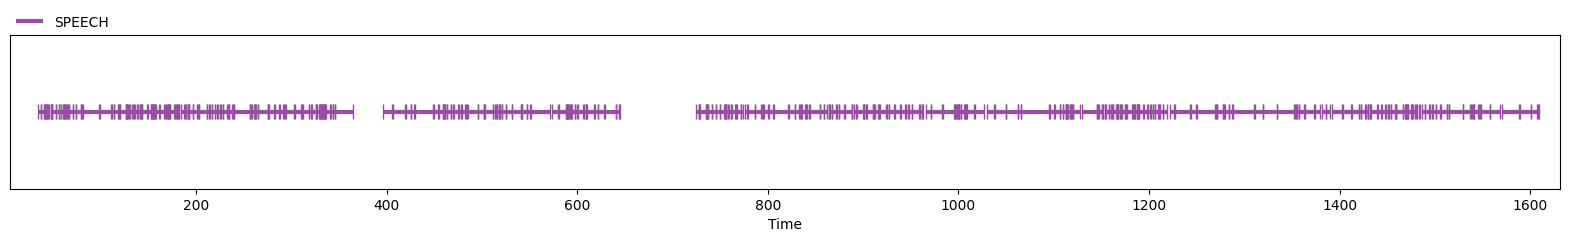

In [16]:
vad